# Grid Interpolation
#### (465 x 159) --> (256 x 128)

In [135]:
from modules.preprocessing import load_data
import torch as pt
from pathlib import Path
import os
from os.path import join
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 180

data = Path(os.path.abspath('')).parent / "data"

In [136]:
coords = pt.load(join(data, "coords.pt"))
xx_orig, yy_orig = coords[list(coords.keys())[0]]
print(xx_orig.shape)
print(yy_orig.shape)

torch.Size([465, 159])
torch.Size([465, 159])


#### Generate test values (0, 1)

In [148]:
y_res_orig = xx_orig.shape[0]
x_res_orig = xx_orig.shape[1]
print(x_res_orig)
print(y_res_orig)

data = pt.tensor([[(i+j)%2 for i in range(x_res_orig)] for j in range(y_res_orig)])

lim = 4
print(xx_orig[:lim, :lim])
print(yy_orig[:lim, :lim])

159
465
tensor([[759.9388, 760.3468, 761.2149, 762.4095],
        [761.2334, 761.6411, 762.5079, 763.6997],
        [762.5268, 762.9341, 763.7998, 764.9886],
        [763.8179, 764.2250, 765.0894, 766.2753]])
tensor([[-75.9459, -75.9459, -75.9459, -75.9459],
        [-76.9180, -76.9178, -76.9185, -76.9206],
        [-77.8915, -77.8912, -77.8925, -77.8967],
        [-78.8682, -78.8676, -78.8697, -78.8760]])


#### Plot original grid

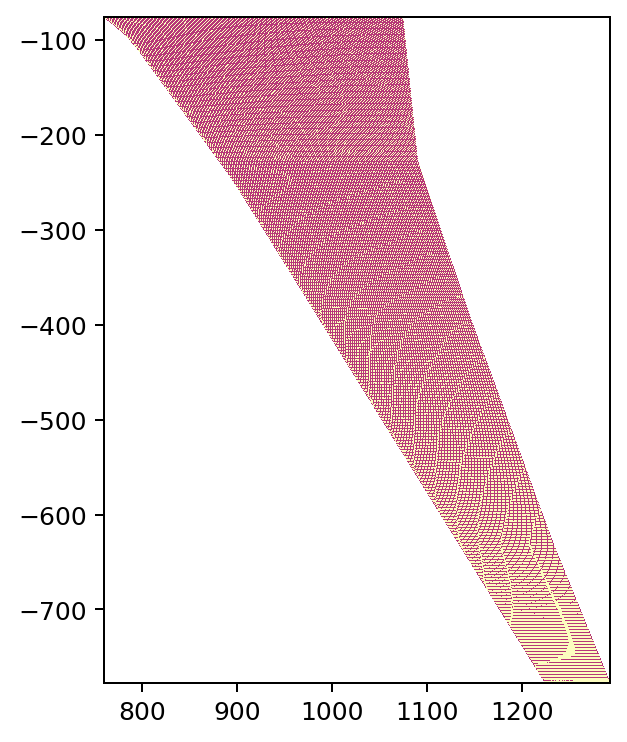

In [149]:
fig, ax1 = plt.subplots(1, 1)

levels = [0.01, 0.99]
cont = ax1.contourf(xx_orig, yy_orig, data, levels=levels, cmap="magma", extend="both")
ax1.set_aspect("equal")
#ax1.set_xticklabels([])
#ax1.set_yticklabels([])

#### Test

torch.Size([256, 128])
torch.Size([256, 128])


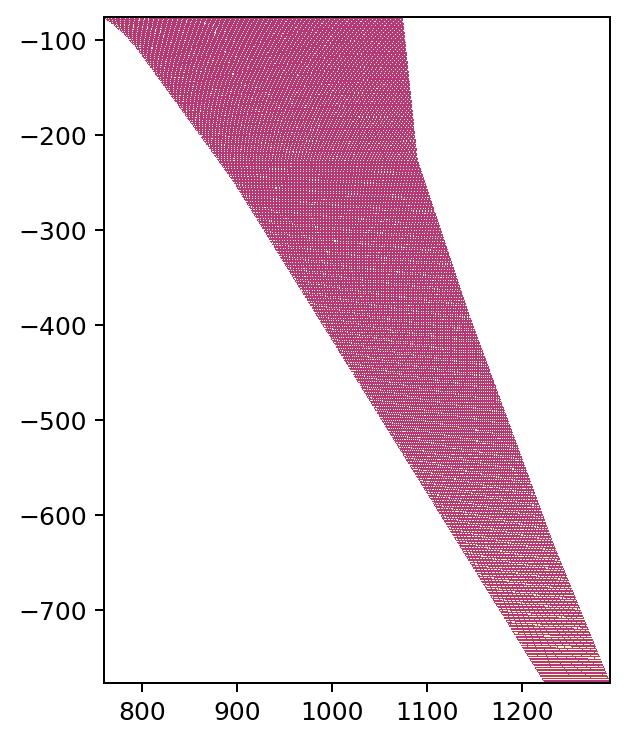

In [158]:
from torch.nn.functional import interpolate

target_shape = (256, 128)

xx_interpolated = interpolate(xx_orig.unsqueeze(0).unsqueeze(0), size=target_shape, mode="bilinear", align_corners=False)
yy_interpolated = interpolate(yy_orig.unsqueeze(0).unsqueeze(0), size=target_shape, mode="bilinear", align_corners=False)

xx_new = xx_interpolated.squeeze()
print(xx_new.shape)
yy_new = yy_interpolated.squeeze()
print(yy_new.shape)


data = pt.tensor([[(i+j)%2 for i in range(target_shape[1])] for j in range(target_shape[0])])

fig, ax1 = plt.subplots(1, 1)

levels = [0.01, 0.99]
cont = ax1.contourf(xx_interpolated.squeeze(), yy_interpolated.squeeze(), data, levels=levels, cmap="magma", extend="both")
ax1.set_aspect("equal")
#ax1.set_xticklabels([])
#ax1.set_yticklabels([])

#### Interpolate grid data

In [140]:
x_res_new = 128
y_res_new = 256

yy_temp = pt.empty((y_res_orig, x_res_new))
xx_temp = pt.empty((y_res_orig, x_res_new))
print(yy_temp.shape)
print(xx_temp.shape)

torch.Size([465, 128])
torch.Size([465, 128])


In [141]:
for row in range(y_res_orig):
    y_val = yy_orig[row][0]
    x_min = min(xx_orig[row, :])
    x_max = max(xx_orig[row, :])

    x_row = pt.linspace(x_min, x_max, x_res_new)
    y_row = pt.full((1, x_res_new), y_val).squeeze()

    xx_temp[row, :] = x_row
    yy_temp[row, :] = y_row

print(xx_temp[:lim, :lim])
print(yy_temp[:lim, :lim])

tensor([[759.9388, 762.4152, 764.8917, 767.3681],
        [761.2334, 763.7006, 766.1679, 768.6351],
        [762.5268, 764.9849, 767.4429, 769.9010],
        [763.8179, 766.2668, 768.7158, 771.1647]])
tensor([[-75.9459, -75.9459, -75.9459, -75.9459],
        [-76.9180, -76.9180, -76.9180, -76.9180],
        [-77.8915, -77.8915, -77.8915, -77.8915],
        [-78.8682, -78.8682, -78.8682, -78.8682]])


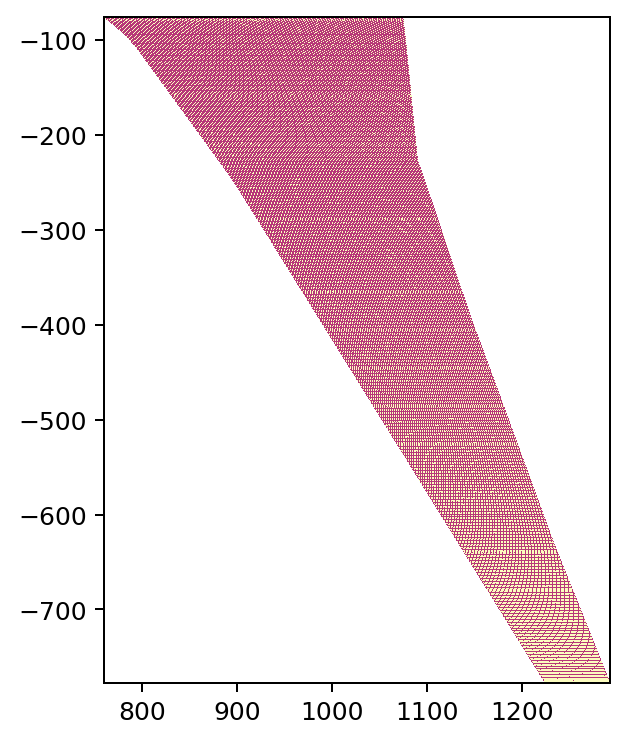

In [142]:
data = pt.tensor([[(i+j)%2 for i in range(x_res_new)] for j in range(y_res_orig)])

fig, ax1 = plt.subplots(1, 1)

levels = [0.01, 0.99]
cont = ax1.contourf(xx_temp, yy_temp, data, levels=levels, cmap="magma", extend="both")
ax1.set_aspect("equal")
#ax1.set_xticklabels([])
#ax1.set_yticklabels([])

In [143]:
yy_new = pt.empty((y_res_new, x_res_new))
xx_new = pt.empty((y_res_new, x_res_new))
print(yy_new.shape)
print(xx_new.shape)

torch.Size([256, 128])
torch.Size([256, 128])


In [144]:
for col in range(x_res_new):
    x_min = min(xx_temp[:, col])
    x_max = max(xx_temp[:, col])

    y_max = min(yy_temp[:, col])
    y_min = max(yy_temp[:, col])

    x_col = pt.linspace(x_min, x_max, y_res_new)
    y_col = pt.linspace(y_min, y_max, y_res_new)

    xx_new[:, col] = x_col
    yy_new[:, col] = y_col

    if col == 0:
        #print(x_col)
        print(x_col.shape)
        #print(y_col)
        print(y_col.shape)


print(xx_new[:lim, :lim])
print(yy_new[:lim, :lim])

torch.Size([256])
torch.Size([256])
tensor([[759.9388, 762.4152, 764.8917, 767.3681],
        [761.7626, 764.2314, 766.7002, 769.1690],
        [763.5864, 766.0475, 768.5087, 770.9699],
        [765.4101, 767.8637, 770.3173, 772.7708]])
tensor([[-75.9459, -75.9459, -75.9459, -75.9459],
        [-78.6953, -78.6953, -78.6953, -78.6953],
        [-81.4446, -81.4446, -81.4446, -81.4446],
        [-84.1940, -84.1940, -84.1940, -84.1940]])


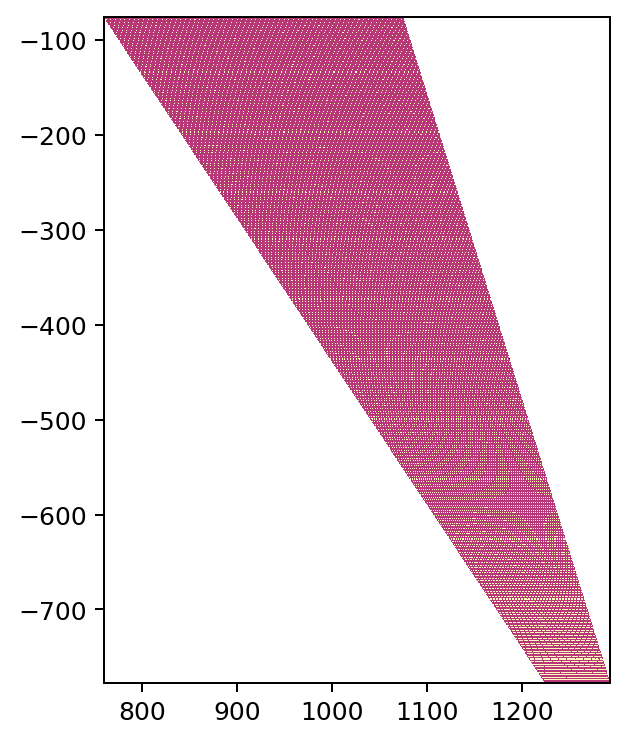

In [145]:
data = pt.tensor([[(i+j)%2 for i in range(x_res_new)] for j in range(y_res_new)])

fig, ax1 = plt.subplots(1, 1)

levels = [0.01, 0.99]
cont = ax1.contourf(xx_new, yy_new, data, levels=levels, cmap="magma", extend="both")
ax1.set_aspect("equal")
#ax1.set_xticklabels([])
#ax1.set_yticklabels([])